# **Dataset description:**
Fashion MNIST
- 70,000 grayscale images
- 28 x 28 image size
- 10 classes

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

# Loading the dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# checking the shapes and dtype
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


# Preprocessing the dataset
- further splits (train-val), normalization for Gradient Descent, defining class names 

In [ ]:
# split the original train set into train-valid splits
# we divide by 255.0 to normalize the values to 0-1 since we are using Gradient Descent
# we use a float 255.0 to convert the images to floats also since Keras loads images as integers instead
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/ 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# checking the first image in the training set
y_train[0], class_names[y_train[0]]

(4, 'Coat')

# Creating the model using the Sequential API

## Method #1 - Adding layers one by one

In [ ]:
# Classification MLP with two hidden layers

# creating a Sequential model
model = keras.models.Sequential()

# flattenning the input in the input layer
model.add(keras.layers.Flatten(input_shape=[28,28]))

# two dense hidden layers
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# dense output layer
model.add(keras.layers.Dense(10, activation="softmax"))

## Method #2 - Pass a list of layers

In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")                               
])

# Viewing the created model

## Viewing the model's layers

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


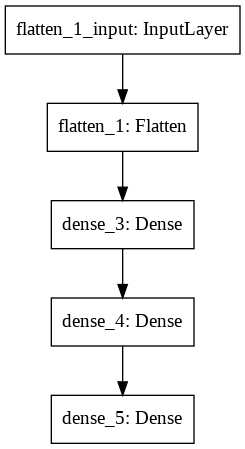

In [ ]:
keras.utils.plot_model(model)

In [ ]:
# get a model's list of layers
model.layers

## Fetching layers by index or name

In [ ]:
# fetch a layer by its index
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [ ]:
# fetch a layer by its name
model.get_layer('dense_3') 

## Accessing the parameters of a layer

In [ ]:
# accessing the parameters of a layer
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.06093101,  0.07005003,  0.01213757, ...,  0.05978303,
         0.06940414, -0.05071634],
       [-0.01889035, -0.06628013, -0.02100167, ..., -0.05772836,
         0.02506391,  0.01302904],
       [ 0.04917233,  0.01555844,  0.06815334, ...,  0.04015029,
         0.00884482,  0.07172188],
       ...,
       [ 0.03710367,  0.04292497,  0.01462013, ..., -0.00364021,
        -0.06703083,  0.00418252],
       [ 0.00754673, -0.03510699,  0.05524209, ...,  0.00747484,
         0.02781895, -0.07203516],
       [ 0.05904375, -0.03132696,  0.03857985, ...,  0.02386444,
         0.07336204, -0.06490206]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

# Compiling the model

- specifying the loss function and optimizer to use

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])

# Training and evaluating the model

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7235 - accuracy: 0.7628 - val_loss: 0.5170 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4906 - accuracy: 0.8287 - val_loss: 0.4452 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4486 - accuracy: 0.8423 - val_loss: 0.4149 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4211 - accuracy: 0.8512 - val_loss: 0.4224 - val_accuracy: 0.8492
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4007 - accuracy: 0.8595 - val_loss: 0.4151 - val_accuracy: 0.8570
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3850 - accuracy: 0.8631 - val_loss: 0.3778 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3697 - accuracy: 0.8692 - val_loss: 0.3728 - val_accuracy:

# Plotting the loss and accuracy of a trained model


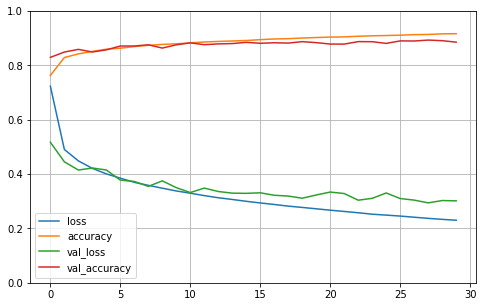

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) 
plt.show()

# Evaluating the model

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 74.1167 - accuracy: 0.8347


[74.11666870117188, 0.8346999883651733]

# Making predictions

In [ ]:
X_new = X_test[:3]

## Looking at the predicted probabilities for each class

In [ ]:
# since we have no new instances, we'll try to reuse the first three instances of the test set
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Looking at the class with the highest estimated probability

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [ ]:
# alternative
np.argmax(model.predict(X_new), axis=-1)

array([9, 2, 1])

In [ ]:
# checking the class names of the predictions
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
# did it predict correctly?
# it does
y_test[:3]

array([9, 2, 1], dtype=uint8)